<a href="https://colab.research.google.com/github/nitinfaye/Air-pollution-Analysis/blob/master/Air_Pollution_analysis_and_Prediction_of_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Owner's Name**: Nitin Faye

##Problem Statement

Description:
Predict the levels of SO2, NO2 and PM2.5 in india (by utilising historical data) and highlight any outliers. Also, allow the user to specify a threshold for each of the metrics.
A possible source of data could be the follow: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data, feel free to use any other related dataset regarding air pollution.
The emphasis is on *how* you develop a solution that could be further improved by another member of the team. Bear in mind that the code will be QA'ed by a member of the tech team.
Ideally, the solution would be developed in such a way that the end-user could see the results by using a single script (e.g., a jupyter notebook)
Finally, please share the link of the repository of your choice. Please avoid any descriptions that will refer back to Conigital on the public description.

#Deliveries :
•	Comments on Code

•	Small Report explaining why the implemented algorithms were selected.

•	Code Repo with full Git logs

•	Code as script or Jupyter notebook commented

•	Unit tests

•	Future work and improvements


* This data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).
* Detect pollution trends

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/data.csv",encoding= 'unicode_escape')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


* **stn_code** : Station code. A code given to each station that recorded the data.
* **sampling_date** : The date when the data was recorded.
* **state** : It represents the states whose air quality data is measured.
* **location** : It represents the city whose air quality data is measured.
* **agency** : Name of the agency that measured the data.
* **type** : The type of area where the measurement was made.
* **so2** : The amount of Sulphur Dioxide measured.
* **no2** : The amount of Nitrogen Dioxide measured
* **rspm** : Respirable Suspended Particulate Matter measured.
* **spm** : Suspended Particulate Matter measured.
* **location_monitoring_station** : It indicates the location of the monitoring area.
* **pm2_5** : It represents the value of particulate matter measured.
* **date** : It represents the date of recording (It is cleaner version of ‘sampling_date’ feature)


In [ ]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  object        
 11  pm2_5                     

# EDA

## Null Values

In [ ]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total / len(df) * 100
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")

In [ ]:
printNullValues(df)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
location                          3   0.000688
sampling_date                     3   0.000688
-------------


* agency’s name have nothing to do with how much polluted the state is.
* stn_code is also unnecessary.
* date and sampling_date are similar
* location_monitoring_station

## Type

In [ ]:
df["type"].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

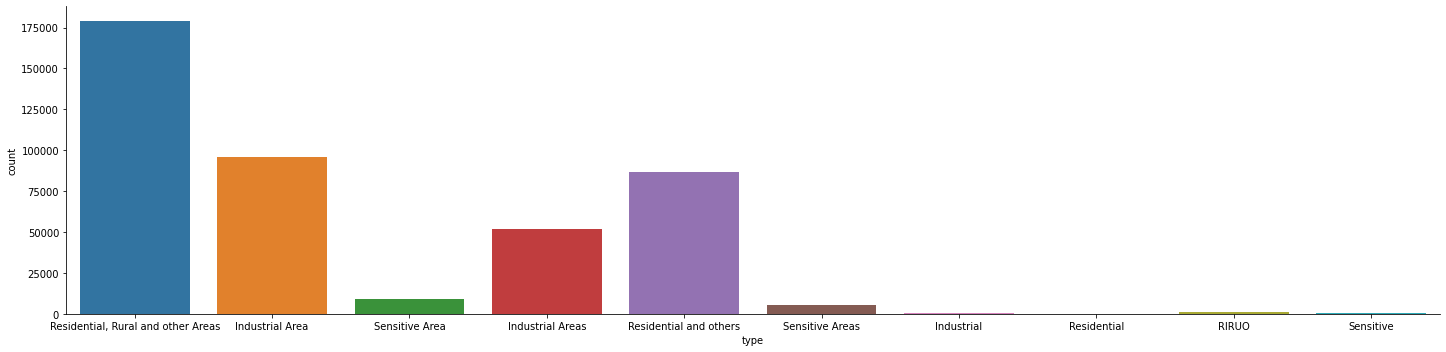

In [ ]:

sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)

### Analysis by type and pollution means

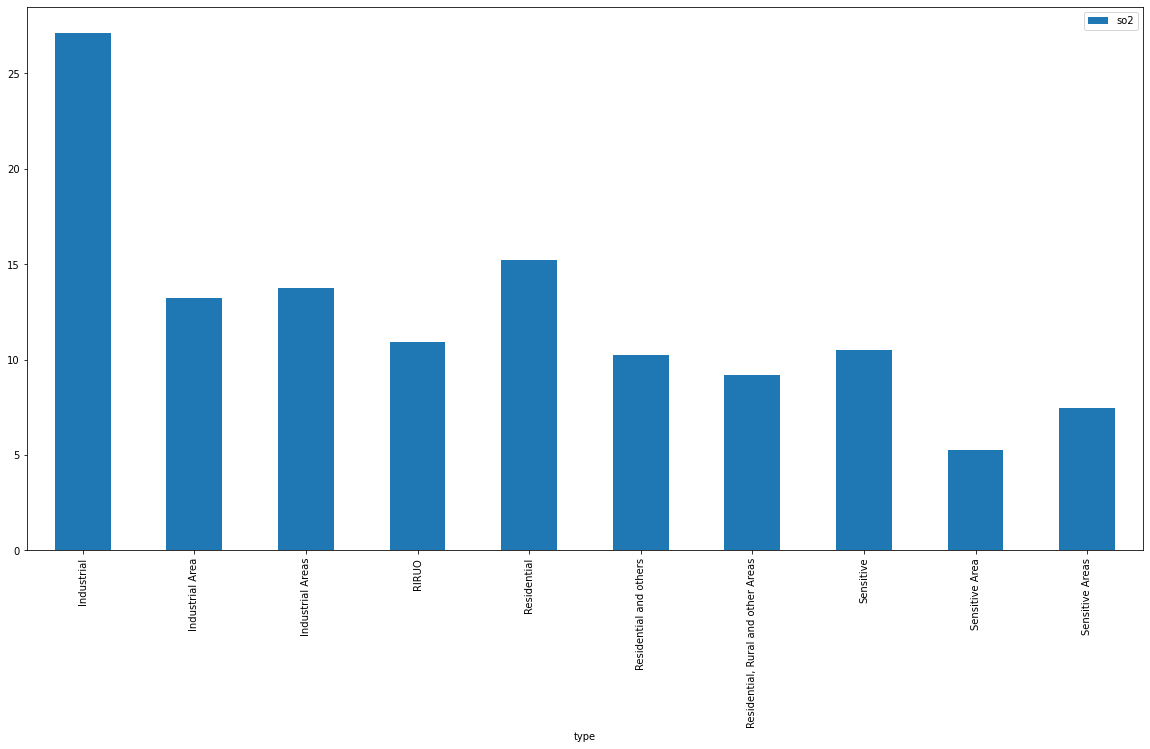

In [ ]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10))

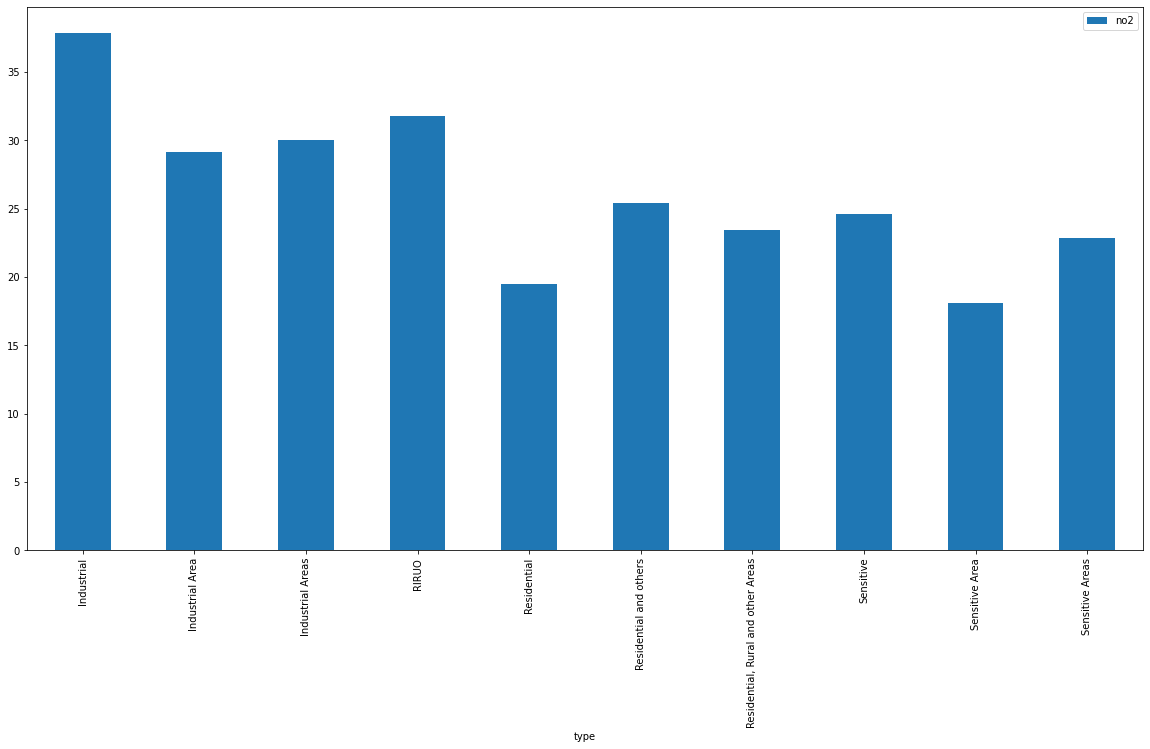

In [ ]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()
grp.plot.bar(figsize = (20,10))

## SO2

Sulfur dioxide

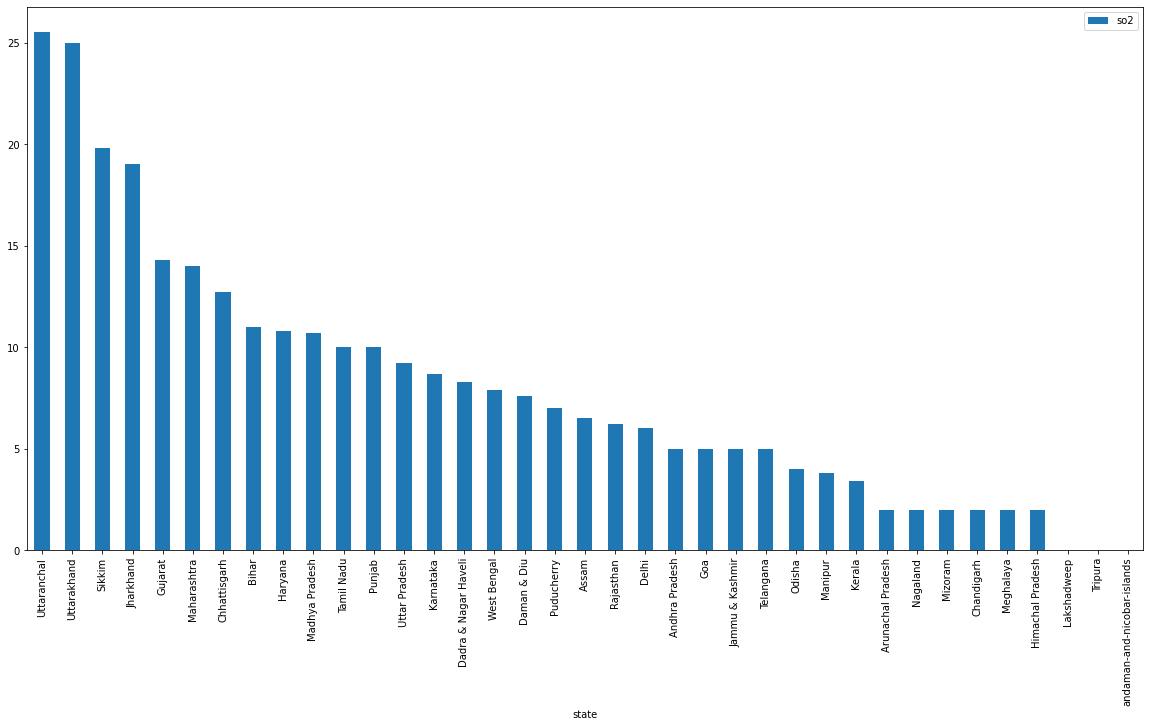

In [ ]:

df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))


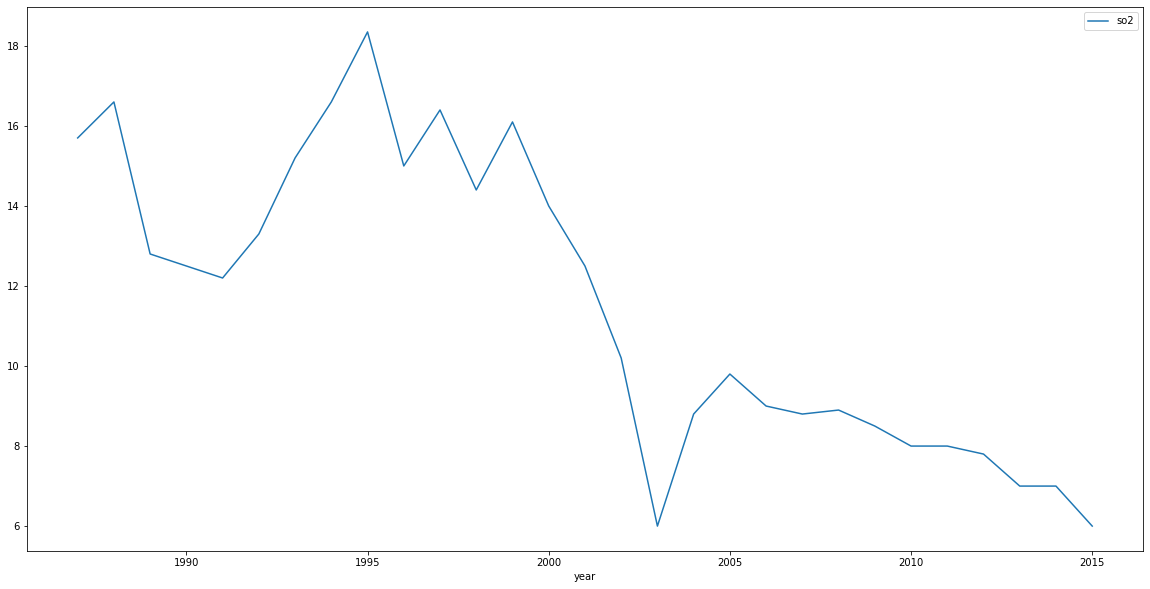

In [ ]:
df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## no2

Nitrogen dioxide

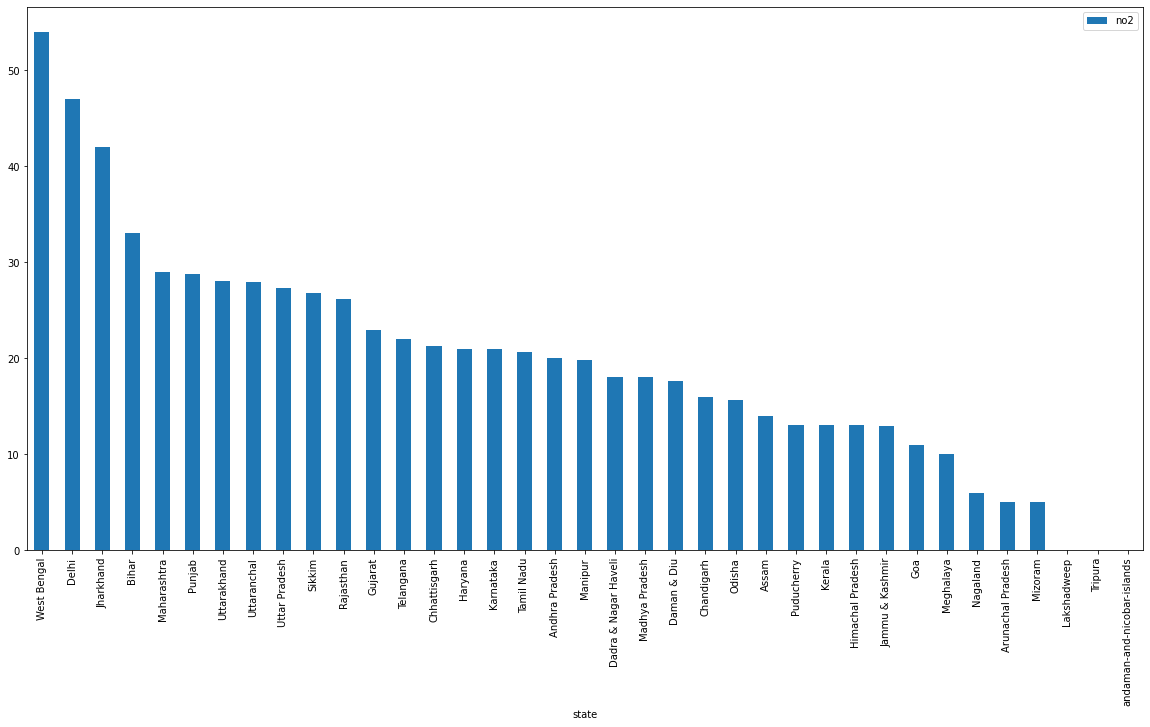

In [ ]:

df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))


In [ ]:
df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## SPM

 Suspended Particulate Matter

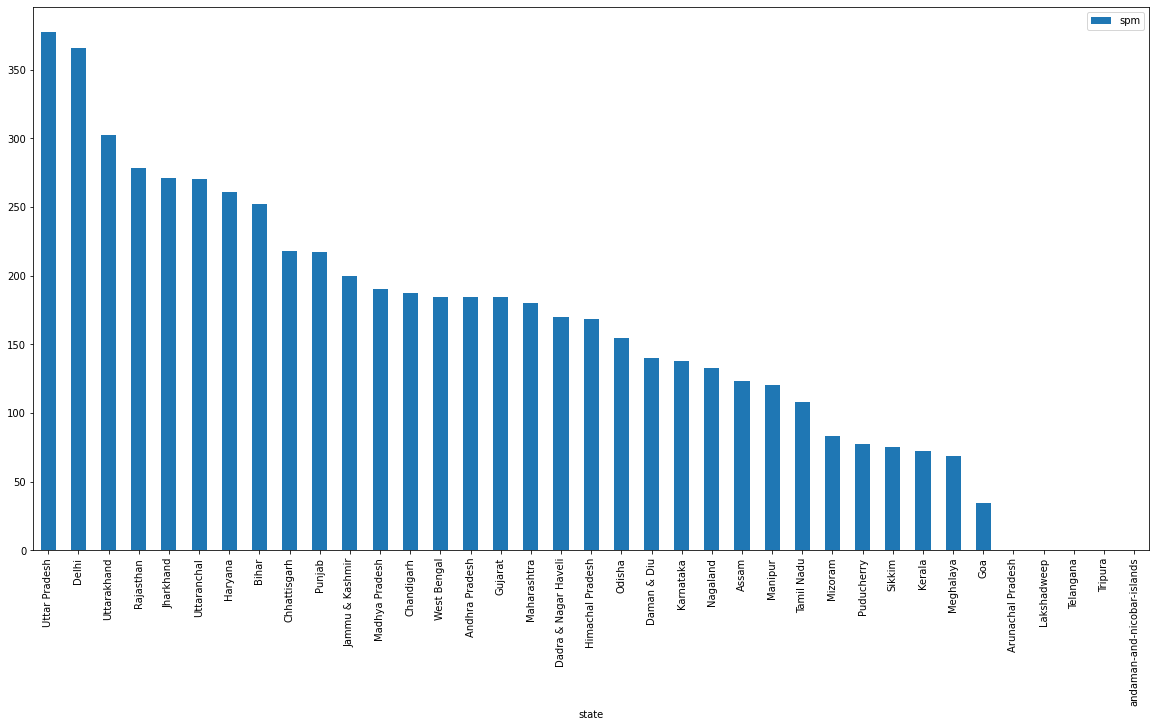

In [ ]:

df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))


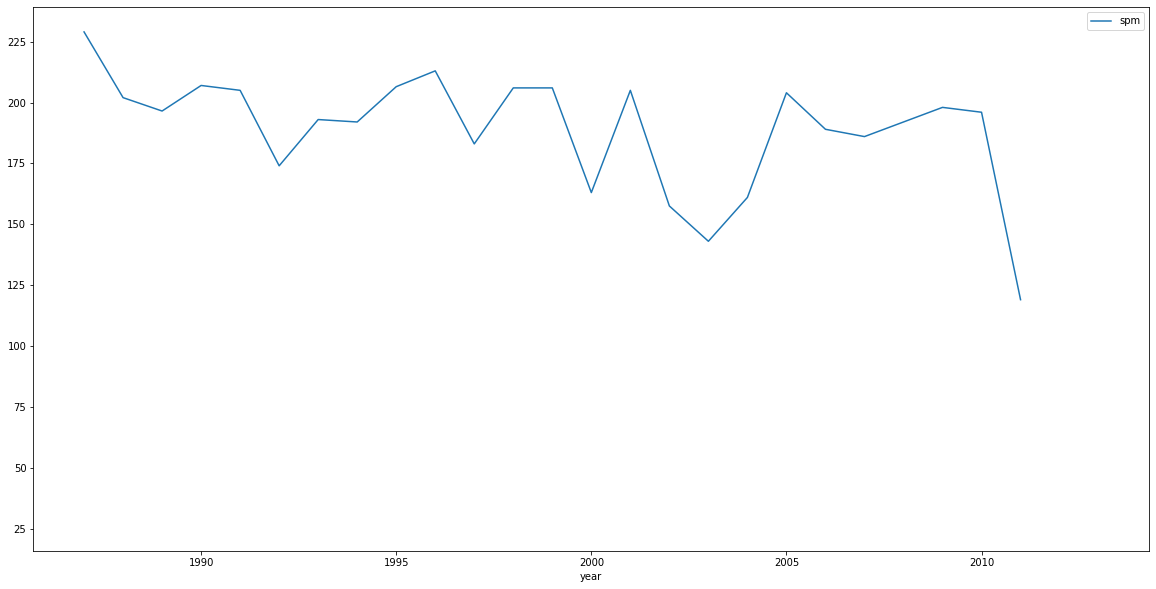

In [ ]:
df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## PIVOT tables

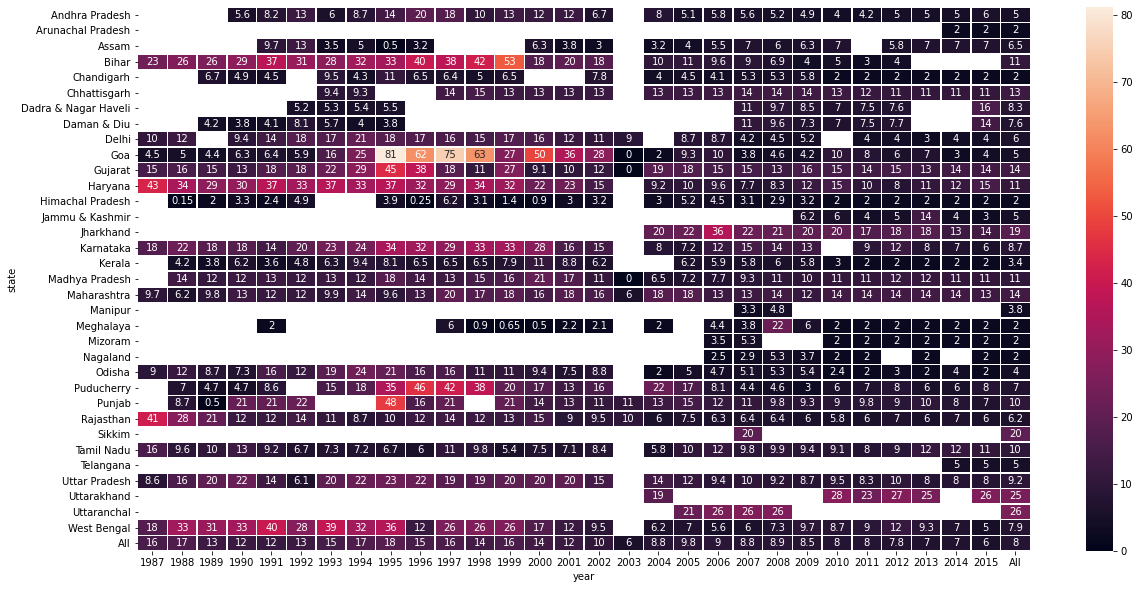

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('so2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

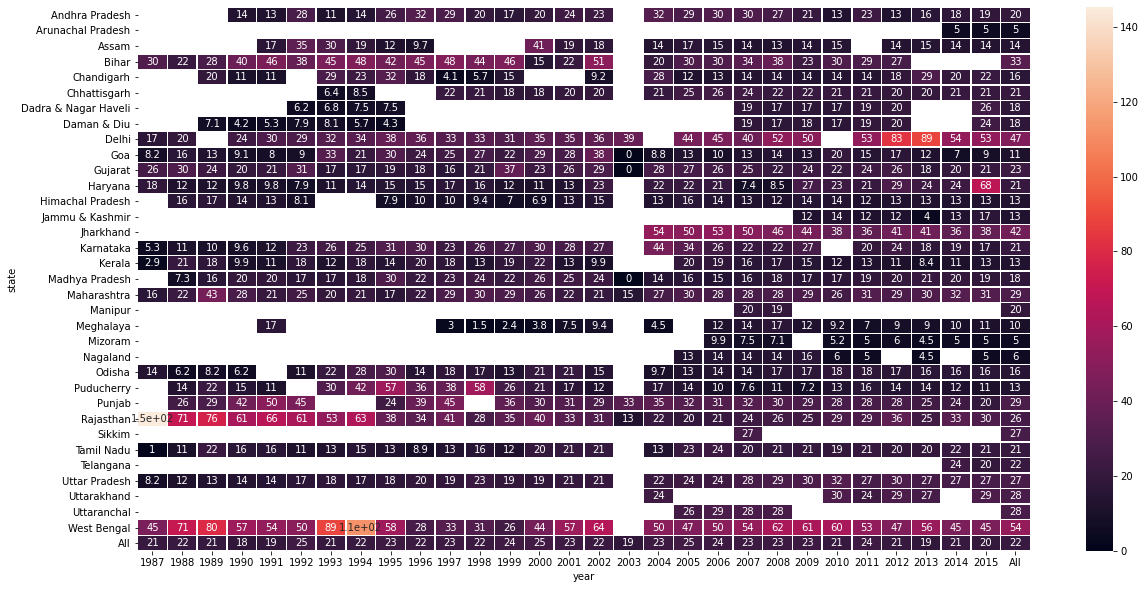

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('no2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

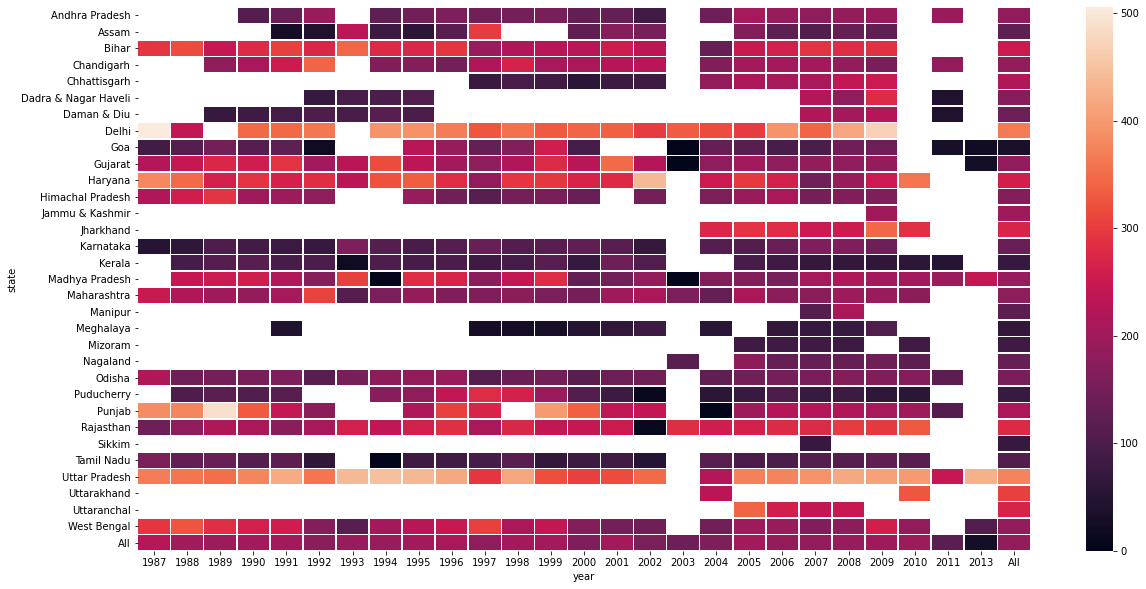

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('spm', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=False, linewidths=.5)

## Trends by regions

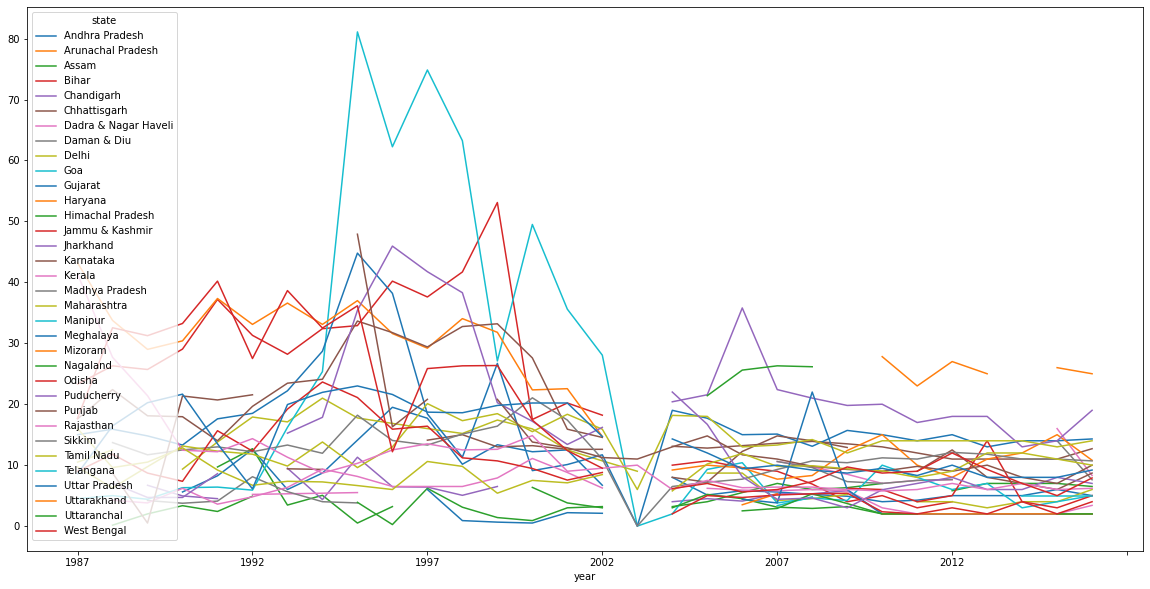

In [ ]:
temp = df.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

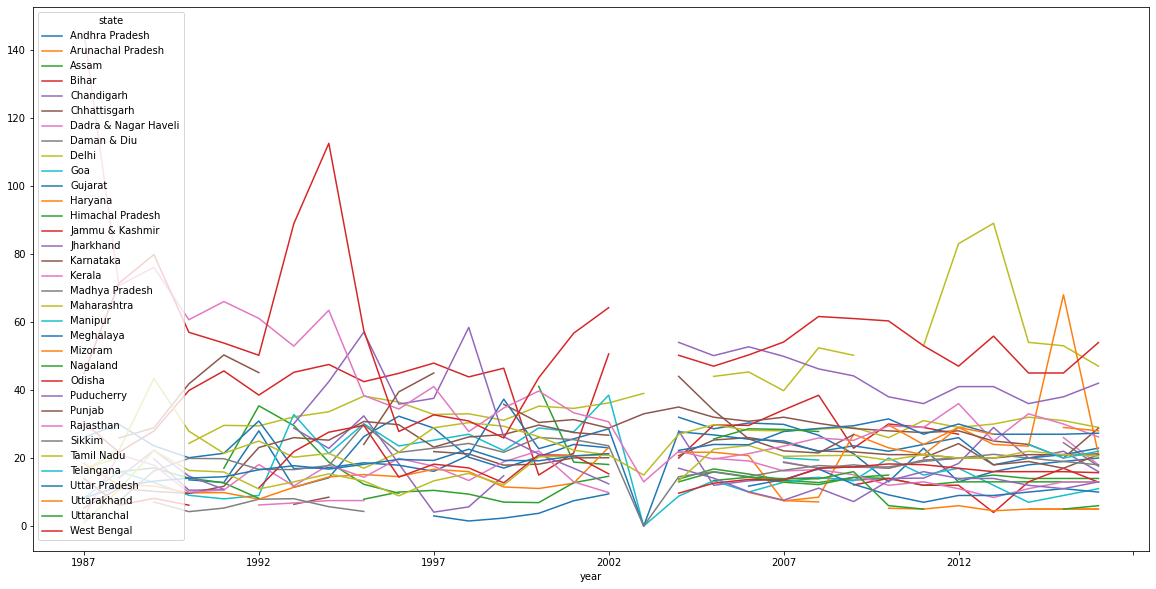

In [ ]:
temp = df.pivot_table('no2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

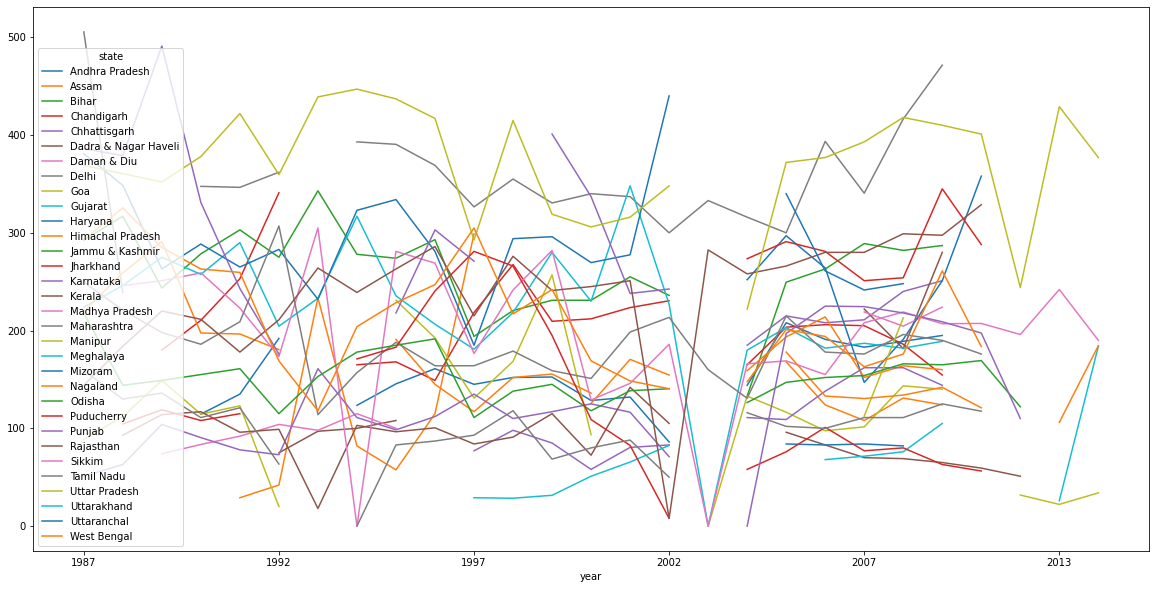

In [ ]:
temp = df.pivot_table('spm', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

* it would make sense to fill the missing values with the mean between the last two available previous and next value?

# Geoplotting

In [ ]:
india = gpd.read_file('/kaggle/input/maps-of-india/India_SHP/INDIA.shp')
india.info()

In [ ]:
india.plot()

* Match the names of states between the two datasets

In [ ]:
india["ST_NAME"] = india["ST_NAME"].apply(lambda x: x.lower())

india = india.set_index("ST_NAME")

df["state"] = df["state"].apply(lambda x: x.lower())

In [ ]:
df_before_2000 = df[df["year"] < 2000]
df_before_2000 = df_before_2000.groupby("state").mean()

In [ ]:
df_after_2000 = df[df["year"] > 2000]
df_after_2000 = df_after_2000.groupby("state").mean()

In [ ]:
result = pd.concat([df_before_2000, india], axis=1, sort=False)
result = result [result["geometry"] != None]
result = result [result["year"] > 0]
from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='so2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean So2 before 2000")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

In [ ]:
result = pd.concat([df_after_2000, india], axis=1, sort=False)
result = result [result["geometry"] != None]
result = result [result["year"] > 0]
from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(result, crs=crs, geometry=result ["geometry"])
gdf['centroid'] = gdf.geometry.centroid
fig,ax = plt.subplots(figsize=(20,10))
gdf.plot(column='so2',ax=ax,alpha=0.4,edgecolor='black',cmap='cool', legend=True)
plt.title("Mean So2 after 2000")
plt.axis('off')

for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf.index):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords="offset points",color='gray')

* two maps show trends in So2 pollution mean

# Time Series Analysis

* so2 Sulfur dioxide

In [ ]:
df_so2 = df[["date", "so2"]]
df_so2 = df_so2.set_index("date")
df_so2 = df_so2.dropna()

In [ ]:
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()

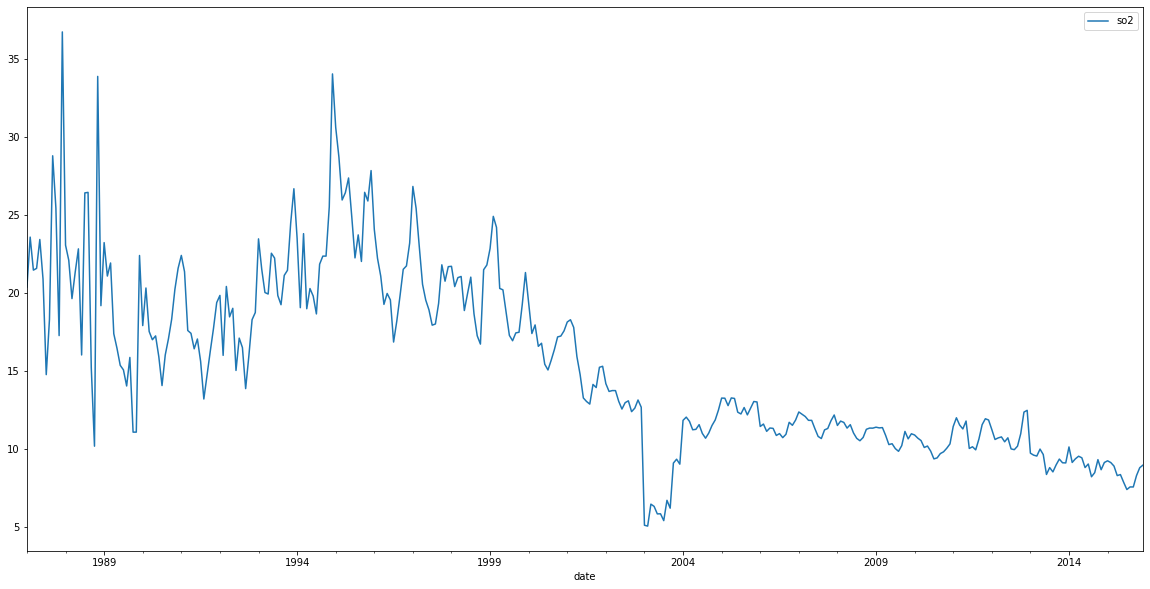

In [ ]:
df_so2_resample.plot(figsize = (20,10))

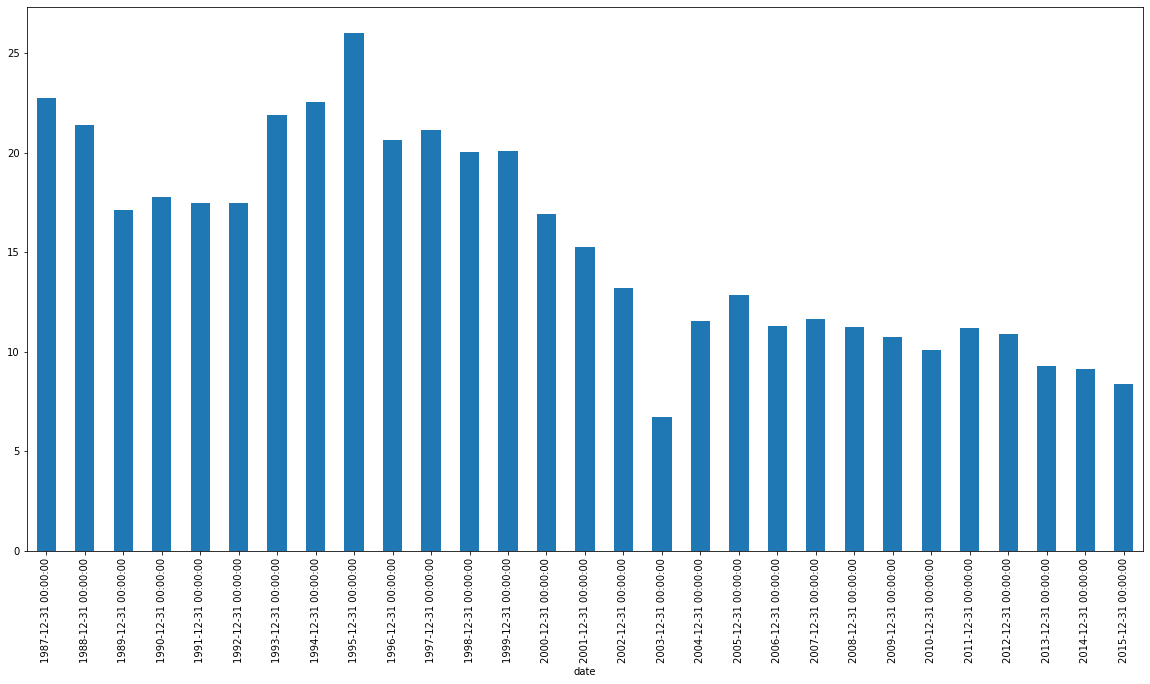

In [ ]:
df_so2_resample["so2"].resample("A").mean().plot.bar(figsize = (20,10))

### ETS Decomposition (Error Trend Seasonality)

* Simple Moving Average

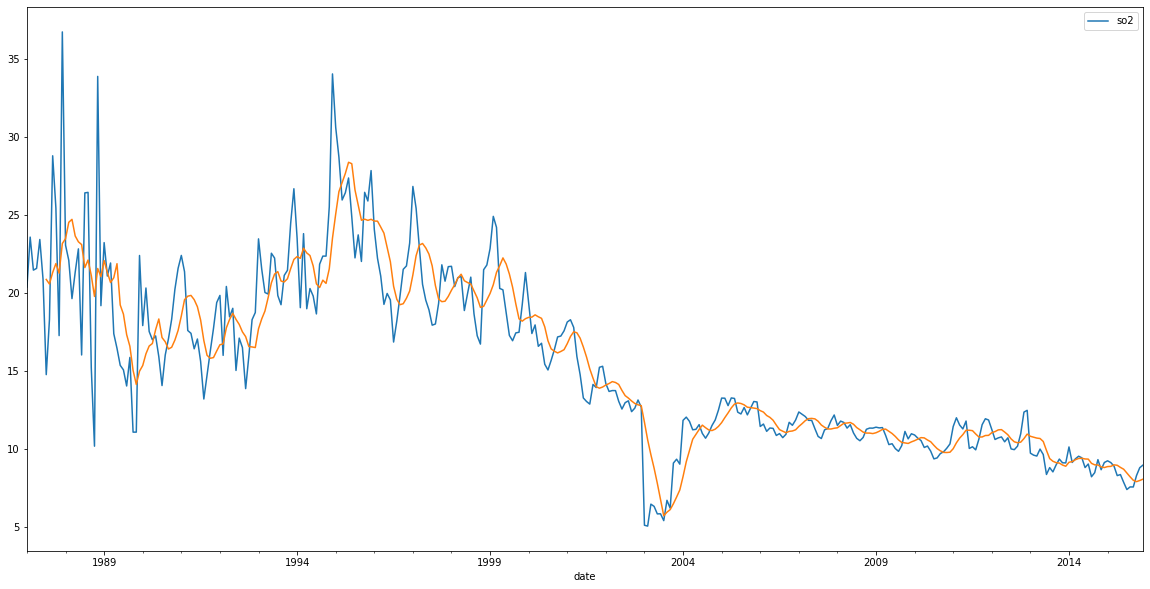

In [ ]:
df_so2_resample.plot(figsize = (20,10))
df_so2_resample.rolling(window = 7).mean()["so2"].plot(figsize = (20,10))

* Esponential weighted moving average EWMA
apply more weight to value more recent

In [ ]:
df_so2_resample["EWMA-7"] = df_so2_resample["so2"].ewm(span=7).mean()

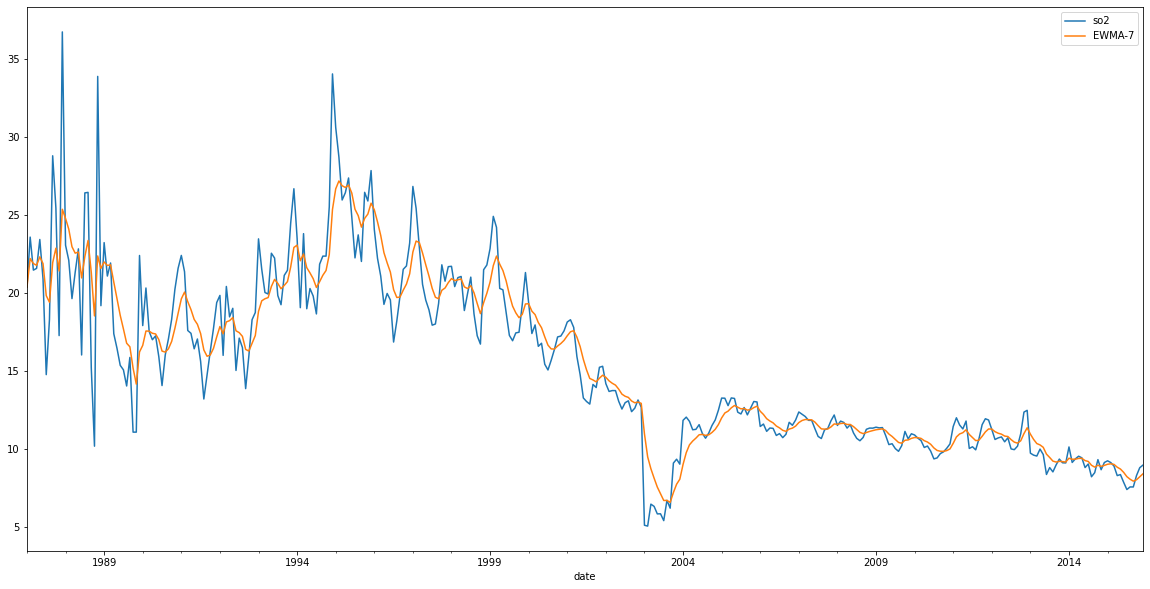

In [ ]:
df_so2_resample.plot(figsize = (20,10))

### ETS



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_so2_resample["so2"], model = "multiplicative")

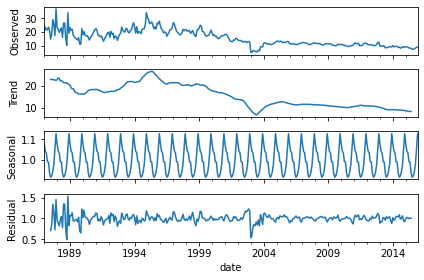

In [ ]:
fig = result.plot()

## ARIMA and Seasonal ARIMA

#### Autoregressive Integrated Moving Averages

* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

#### Testing the Stationarity

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.



In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_so2_resample["so2"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3887732131662935
p-value : 0.5876463899272585
#Lags Used : 14
Number of Observations Used : 333
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


* the data is seasonal ---> use Seasonal ARIMA

In [ ]:
df_so2_resample["so2_first_diff"] = df_so2_resample["so2"] - df_so2_resample["so2"].shift(7)
# CHECK
result = adfuller(df_so2_resample["so2_first_diff"].dropna() )
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.264624632775819
p-value : 0.0005112203813366638
#Lags Used : 17
Number of Observations Used : 323
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


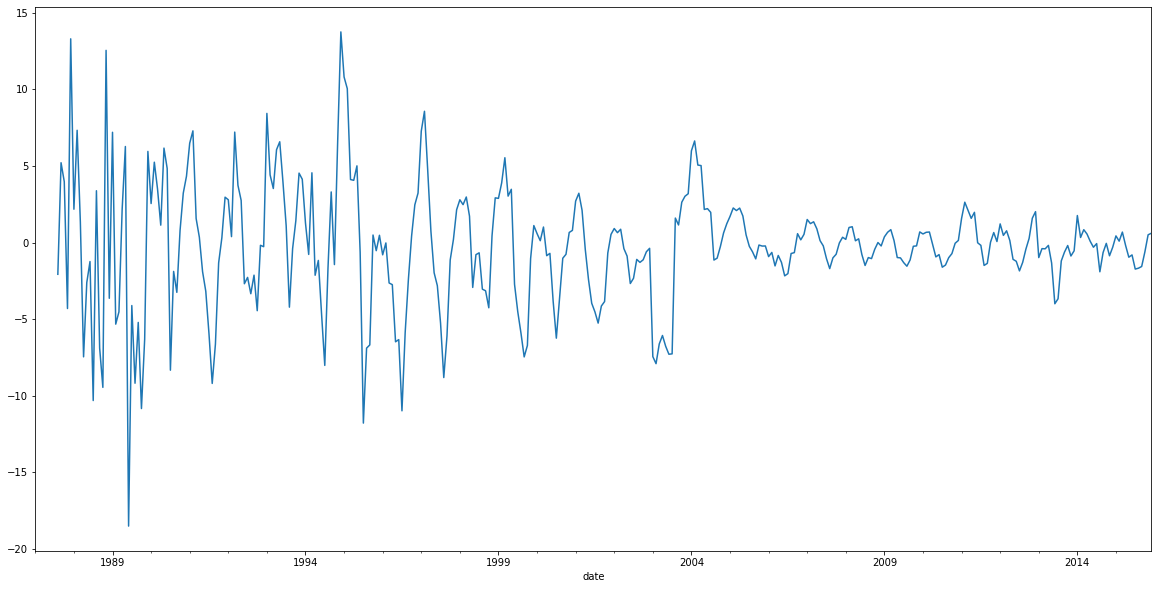

In [ ]:
df_so2_resample["so2_first_diff"].plot(figsize = (20,10))

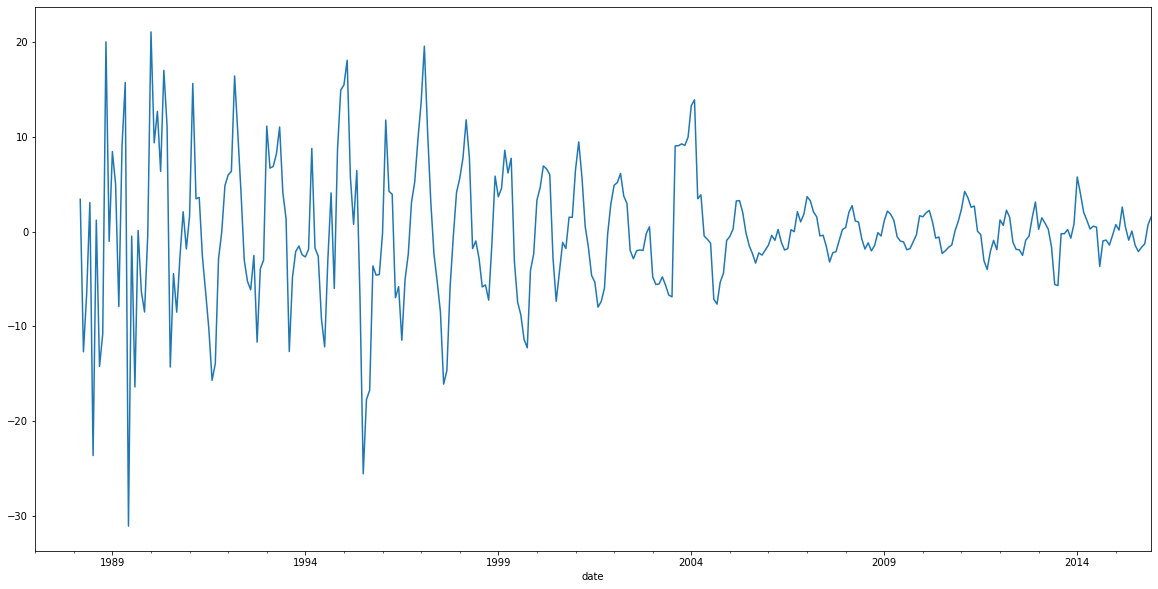

In [ ]:
df_so2_resample["so2_second_diff"] = df_so2_resample["so2_first_diff"] - df_so2_resample["so2_first_diff"].shift(7)
df_so2_resample["so2_second_diff"].plot(figsize = (20,10))

## Using the Seasonal ARIMA model

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                so2   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 48)   Log Likelihood                -760.884
Date:                            Tue, 21 Jul 2020   AIC                           1527.768
Time:                                    21:33:48   BIC                           1538.869
Sample:                                01-31-1987   HQIC                          1532.211
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.1186      0.249     -0.476      0.634      -0.607       0.370
ma.S.L48      -0.2594      0.286   

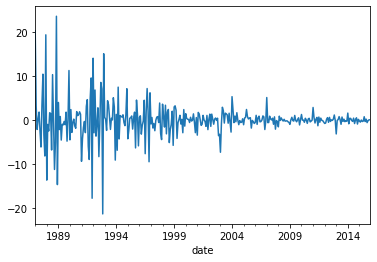

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df_so2_resample["so2"],order=(0,1,0), seasonal_order=(1,1,1,48))
results = model.fit()
print(results.summary())
results.resid.plot()

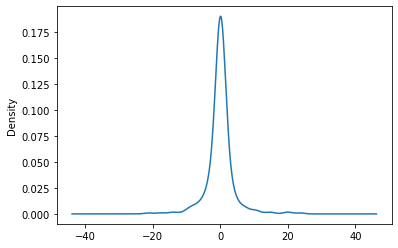

In [ ]:
results.resid.plot(kind='kde')

#### Check with known data

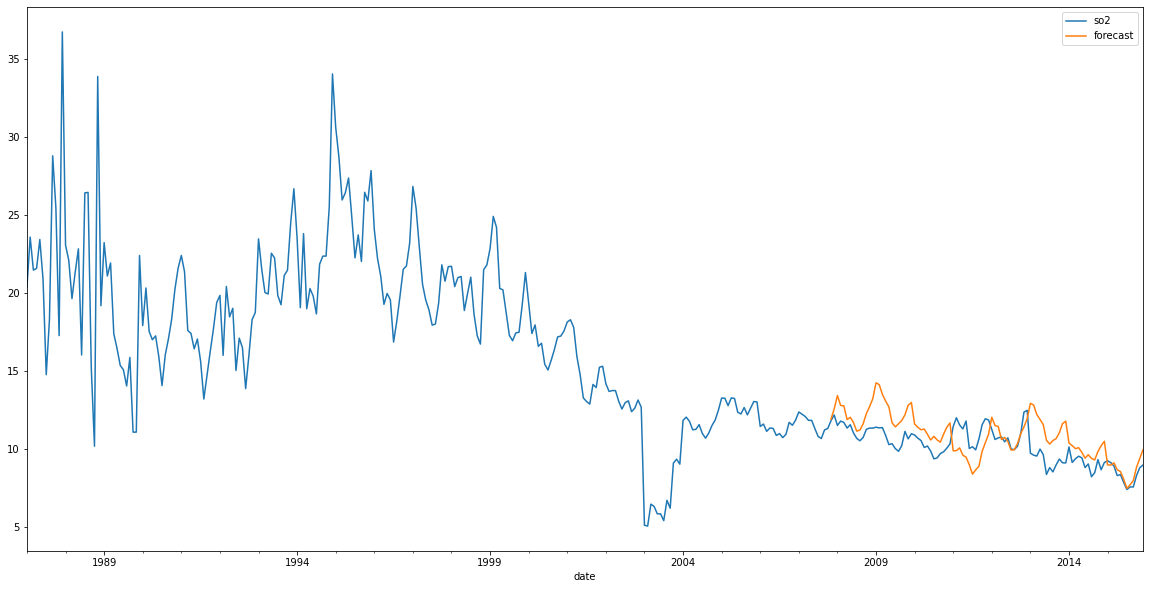

In [ ]:
df_so2_resample['forecast'] = results.predict(start = 250, end= 400, dynamic= True)
df_so2_resample[['so2','forecast']].plot(figsize=(20,10))

# Forecast

* so2

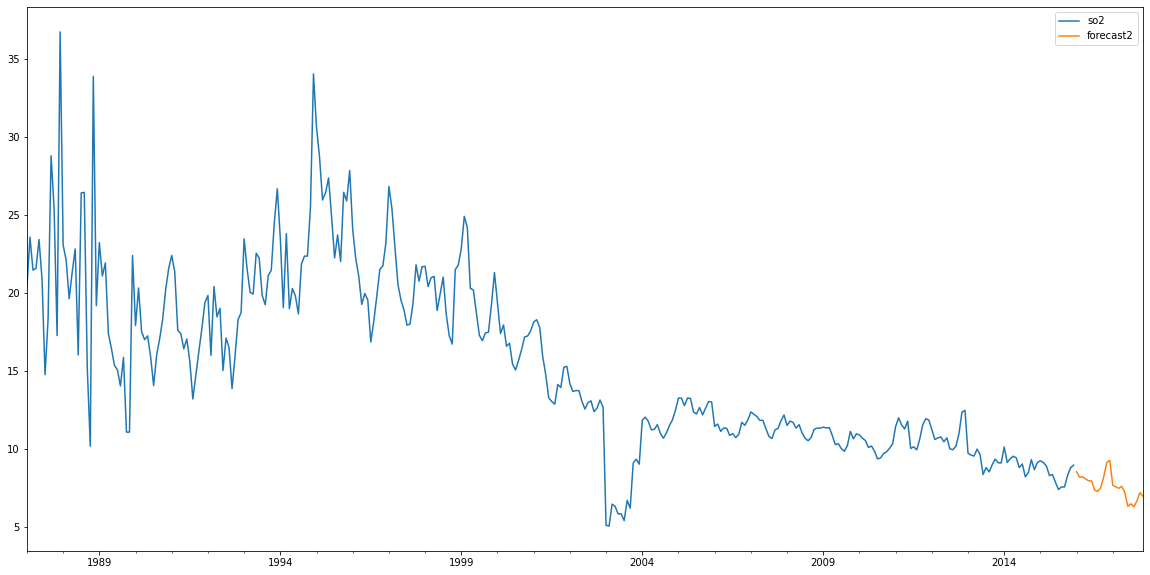

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_so2_resample.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_so2_resample.columns)
future_df = pd.concat([df_so2_resample,future_dates_df])
future_df['forecast2'] = results.predict(start = 348, end = 540, dynamic= True)
future_df[['so2', 'forecast2']].plot(figsize=(20, 10))